<a href="https://colab.research.google.com/github/basselkassem/predict_income_potential/blob/master/model_lgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
path = "/content/gdrive/My Drive/Colab Notebooks/predict_income_potential/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cd gdrive/

In [4]:
!ls

gdrive	sample_data


In [0]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import log_loss 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv(path + 'data.csv')
df = df.drop(columns = ['age_bin', 'hours_per_week_bin', 'age_hours_bin'])

In [37]:
X, y = df.drop(columns = 'target'), df[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
gbm = lgb.LGBMClassifier(n_estimators = 1000, silent = False)
gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=5, verbose=1)
ret = log_loss(y_test, gbm.predict_proba(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.510898
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.479597
[3]	valid_0's binary_logloss: 0.454952
[4]	valid_0's binary_logloss: 0.434138
[5]	valid_0's binary_logloss: 0.416358
[6]	valid_0's binary_logloss: 0.401977
[7]	valid_0's binary_logloss: 0.389196
[8]	valid_0's binary_logloss: 0.377911
[9]	valid_0's binary_logloss: 0.36683
[10]	valid_0's binary_logloss: 0.35879
[11]	valid_0's binary_logloss: 0.350711
[12]	valid_0's binary_logloss: 0.343725
[13]	valid_0's binary_logloss: 0.337423
[14]	valid_0's binary_logloss: 0.332247
[15]	valid_0's binary_logloss: 0.327564
[16]	valid_0's binary_logloss: 0.323382
[17]	valid_0's binary_logloss: 0.319563
[18]	valid_0's binary_logloss: 0.316309
[19]	valid_0's binary_logloss: 0.313495
[20]	valid_0's binary_logloss: 0.309975
[21]	valid_0's binary_logloss: 0.307571
[22]	valid_0's binary_logloss: 0.305639
[23]	valid_0's binary_logloss: 0.303885
[24]	valid_0's binary_logloss:

(29287, 19)
(29287, 1)
---validation----
(9763, 19)
(9763, 1)
---test----
(9763, 19)
(9763, 1)
[1]	training's binary_logloss: 0.507251	valid_1's binary_logloss: 0.504926
Training until validation scores don't improve for 25 rounds.
[2]	training's binary_logloss: 0.475928	valid_1's binary_logloss: 0.473515
[3]	training's binary_logloss: 0.450959	valid_1's binary_logloss: 0.448472
[4]	training's binary_logloss: 0.430369	valid_1's binary_logloss: 0.427712
[5]	training's binary_logloss: 0.413025	valid_1's binary_logloss: 0.410431
[6]	training's binary_logloss: 0.398438	valid_1's binary_logloss: 0.395925
[7]	training's binary_logloss: 0.385389	valid_1's binary_logloss: 0.382874
[8]	training's binary_logloss: 0.373971	valid_1's binary_logloss: 0.371772
[9]	training's binary_logloss: 0.363991	valid_1's binary_logloss: 0.361711
[10]	training's binary_logloss: 0.355426	valid_1's binary_logloss: 0.353143
[11]	training's binary_logloss: 0.347902	valid_1's binary_logloss: 0.345921
[12]	training's 

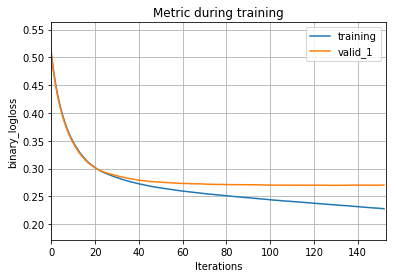

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print('---validation----')
print(X_val.shape)
print(y_val.shape)
print('---test----')
print(X_test.shape)
print(y_test.shape)
d_train = lgb.Dataset(X_train, y_train)
d_val = lgb.Dataset(X_val, y_val)
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
}
n_estimator = 2000
evals_result = {}
model = lgb.train(params, 
                   d_train, 
                   n_estimator, 
                   valid_sets = [d_train, d_val], 
                   evals_result = evals_result,
                   verbose_eval = 1, 
                   early_stopping_rounds = 25)
ax = lgb.plot_metric(evals_result)
plt.show()

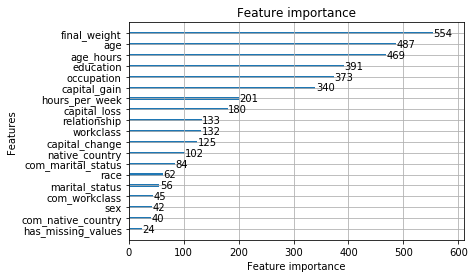

In [40]:
ax = lgb.plot_importance(model, max_num_features = 20)
plt.show()

In [41]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve
print('------train-----------')
y_train_hat = model.predict(X_train, num_iteration=model.best_iteration)
print(accuracy_score(y_train, y_train_hat.round()))
print(f1_score(y_train, y_train_hat.round()))
print(roc_auc_score(y_train, y_train_hat.round()))
print('------validation-------')
y_val_hat = model.predict(X_val)
print(accuracy_score(y_val, y_val_hat.round()))
print(f1_score(y_val, y_val_hat.round()))
print(roc_auc_score(y_val, y_val_hat.round()))
print('------test-------------')
y_test_hat = model.predict(X_test)
print(accuracy_score(y_test, y_test_hat.round()))
print(f1_score(y_test, y_test_hat.round()))
print(roc_auc_score(y_test, y_test_hat.round()))

------train-----------
0.8918291392085226
0.7542662116040956
0.8245178071468856
------validation-------
0.8779063812352761
0.718336483931947
0.8021143510136315
------test-------------
0.8711461640889071
0.7165389815232088
0.8017281321863555
